# MATH 4581 Final Project 
## 3 different ways to calculate Value at Risk(VaR) - Sumin Kim
The maximum amount of loss that can be incurred by Monte Carlo simulations (Value at Risk, hereinafter referred to as VaR) is used to measure the risk of the portfolio. The difference from volatility is that the VaR statistically measures the maximum loss and probability that a portfolio can incur over a period of time, ignoring profits. This is why the VaR is usually expressed as an absolute value (because it is viewed only in the case of loss).
There are three methods to calculate Value at Risk, The first one is Historcial Method, the second one is Variance Covariance method, and the last one is Monte Carlo method. 


# 0. Statistics on the data 
On the project, I will use stock data from Jan 2010 to Dec 2022 of Apple, listed in NASDAQ and perform those 3 different methods to calculate VaR.
Below is the statistics of the data.  

In [64]:
pip install jupyter_contrib_nbextensions

     |████████████████████████████████| 23.5 MB 4.6 MB/s eta 0:00:01
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 481 kB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 273 kB 30.6 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 33.2 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 25.4 MB/s eta 0:00:01
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
     |████████████████████████████████| 77 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 92 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 109 kB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 2.

Statistics
------------  ---------
mean          48.8987
std           47.4351
skew           1.36841
kurt           0.489691


/var/folders/k9/750v28vx2jqbkgc108wfp5280000gn/T/ipykernel_84783/1647376811.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(array([  2.,   0.,   0.,   0.,   2.,   0.,   0.,   3.,   0.,   1.,   7.,
          9.,   8.,  20.,  33.,  51., 105., 147., 241., 447., 639., 541.,
        397., 275., 132.,  80.,  43.,  25.,  13.,   6.,   7.,   3.,   4.,
          2.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([-0.12864701, -0.12243562, -0.11622423, -0.11001285, -0.10380146,
        -0.09759008, -0.09137869, -0.0851673 , -0.07895592, -0.07274453,
        -0.06653314, -0.06032176, -0.05411037, -0.04789898, -0.0416876 ,
        -0.03547621, -0.02926483, -0.02305344, -0.01684205, -0.01063067,
        -0.00441928,  0.00179211,  0.00800349,  0.01421488,  0.02042627,
         0.02663765,  0.03284904,  0.03906042,  0.04527181,  0.0514832 ,
         0.05769458,  0.06390597,  0.07011736,  0.07632874,  0.08254013,
         0.08875151,  0.0949629 ,  0.10117429,  0.10738567,  0.11359706,
         0.11980845]),
 <BarContainer object of 40 artists>)

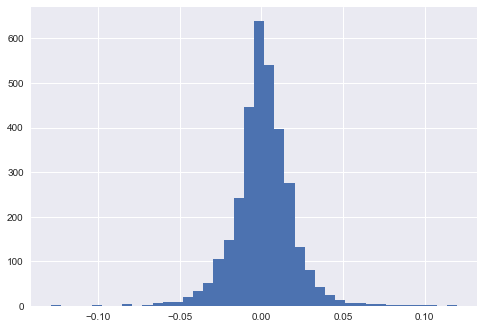

In [61]:
from scipy.stats import skew, kurtosis

data = fdr.DataReader('AAPL', '2010-01-01', '2022-12-01')
data = data[['Adj Close']]

#calculate daily return and drop the missing data
returns_daily = data.pct_change()
returns_daily = returns_daily.dropna()

mean = np.mean(data['Adj Close'])
std = np.std(data['Adj Close'])
skewness = skew(data['Adj Close'])
kurt = kurtosis(data['Adj Close'])
print(tabulate([['mean',mean],['std',std],['skew',skewness],['kurt',kurt]],headers = ['Statistics',' ']))

#show the distribution in graph 
plt.style.use('seaborn')
plt.hist(returns_daily['Adj Close'],bins = 40)

## 1. Historical Method 
This can be seen as a simplified form of Monte Carlo VaR, also known as a historical simulation model, and both estimate VaR by a full valuation method that actually calculates the value of all assets or positions that make up the portfolio through simulation. 

It has been argued that the historical VaR, which goes through this estimation process, accurately reflects the kurtosis of the market because it is easy to implement and the scenario is derived directly from market data. On the other hand, because the number of scenarios used is limited due to the availability of historical data, this method may have a greater convergence error than Monte Carlo VaR. Of course, this historical VaR can take into account periods, accommodate nonlinearity and nonnormal distributions, reflect both gamma risk and Vega risk and correlations, is not based on specific assumptions about the valuation model or on specific price changes of the underlying asset, and there is not based on a specific valuation model risk. However, if historical data on a specific day are excluded from the analysis without considering the temporarily increased volatility, the risk measurement can change significantly.

In [3]:
pip install bs4

  Using cached bs4-0.0.1-py3-none-any.whl
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install Finance-DataReader


  Using cached finance_datareader-0.9.50-py3-none-any.whl (19 kB)
  Using cached requests_file-1.5.1-py2.py3-none-any.whl (3.7 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached pandas-1.5.2-cp39-cp39-macosx_10_9_x86_64.whl (12.1 MB)
  Using cached lxml-4.9.1-cp39-cp39-macosx_10_15_x86_64.whl (4.6 MB)
  Using cached numpy-1.23.5-cp39-cp39-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

  Using cached matplotlib-3.6.2-cp39-cp39-macosx_10_12_x86_64.whl (7.3 MB)
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached Pillow-9.3.0-cp39-cp39-macosx_10_10_x86_64.whl (3.3 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.6-cp39-cp39-macosx_10_9_x86_64.whl (240 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
#libraries
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

Confidence level           VaR
------------------  ----------
90%                 -0.0191951
95%                 -0.0270188
99%                 -0.0476422


/var/folders/k9/750v28vx2jqbkgc108wfp5280000gn/T/ipykernel_84783/1318405592.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


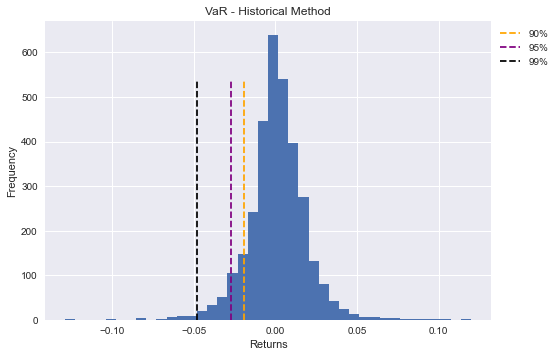

In [36]:
data = fdr.DataReader('AAPL', '2010-01-01', '2022-12-01')
data = data[['Adj Close']]


#calculate daily return and drop the missing data
returns_daily = data.pct_change()
returns_daily = returns_daily.dropna()

#get VaR
returns_daily.sort_values('Adj Close',inplace=True)
q_90 = returns_daily['Adj Close'].quantile(0.10)
q_95 = returns_daily['Adj Close'].quantile(0.05)
q_99 = returns_daily['Adj Close'].quantile(0.01)

hist_var = np.array([q_90,q_95,q_99])

print(tabulate([['90%',q_90],['95%',q_95],['99%',q_99]],headers = ['Confidence level','VaR']))

#graph
plt.style.use('seaborn')
plt.hist(returns_daily['Adj Close'],bins = 40)

#confidence level 
plt.axvline(x=q_90, color='orange',  ls='--', ymin=0, ymax=0.8, label='90%')
plt.axvline(x=q_95, color='purple', ls='--', ymin=0, ymax=0.8, label='95%')
plt.axvline(x=q_99, color='black',  ls='--', ymin=0, ymax=0.8, label='99%')

plt.title("VaR - Historical Method")
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.savefig('var_historical.jpg')
plt.show()

mean = np.mean(returns_daily['Adj Close'])
std = np.std(returns_daily['Adj Close'])


The result shows that there's 90% confidence that over the day the stock will not lose more than 0.019% of the investment, 95% confidence that will not lose more than 0.027%, and 99% confidence that will not lose more than 0.047%. 


# 2. Variance Covariance Method 
This method is also a type of variance/covariance VaR, also called Greek VaR. This introduces second-order sensitivity to analysis by abandoning the assumption of linearity regarding price volatility of the portfolio among the assumptions of the parametric VaR and adopting a quadratic assumption. Sophisticated calculations are required to obtain accurate VaR estimates by this model, but by orthogonalizing the covariance matrix, the probability variable for the future value of the portfolio can be expressed as the sum of the normal probability variables and constant terms in the chi-squared random variables, and the VaR value of the portfolio can be determined through such characterization. This delta-gamma VaR is reasonable for most portfolios when estimating the adequacy of the secondary assumption and only one day's VaR, except for those portfolios where exposure to exotic derivatives such as near-maturity options or knock-out options is important.

And this is not practical even when there are many risk factors. This is because the amount of data needed increases exponentially. However, according to the quantitative criteria for using the BIS's internal model, the bank's internal model must capture the non-linear price characteristics of the option position, and each bank's risk measurement system must have a set of risk factors that capture the potential market rate and price volatility in the option position.

In [13]:
pip install scipy

  Using cached scipy-1.9.3-cp39-cp39-macosx_10_9_x86_64.whl (34.3 MB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from scipy.stats import norm

Confidence level           VaR
------------------  ----------
90%                 -0.0220449
95%                 -0.0286133
99%                 -0.0409345


/var/folders/k9/750v28vx2jqbkgc108wfp5280000gn/T/ipykernel_84783/2104722627.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


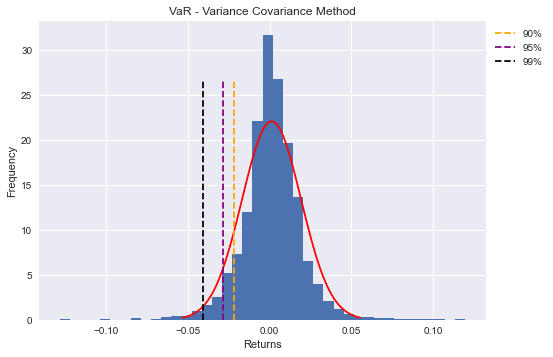

In [35]:
# get data from FinanceDataReader library
data = fdr.DataReader('AAPL', '2010-01-01', '2022-12-01')
data = data[['Adj Close']]


# calculate daily revenue / drop na values
returns_daily = data.pct_change()
returns_daily = returns_daily.dropna()

#mean, std
mean = np.mean(returns_daily['Adj Close'])
std = np.std(returns_daily['Adj Close'])

# VaR
returns_daily.sort_values('Adj Close',inplace=True)
var_90 = norm.ppf(1-0.90,mean,std) #ppf : Percent point function
var_95 = norm.ppf(1-0.95,mean,std)
var_99 = norm.ppf(1-0.99,mean,std)

#result
print(tabulate([['90%',var_90],['95%',var_95],['99%',var_99]],headers = ['Confidence level','VaR']))

#graph
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('seaborn')

plt.hist(returns_daily['Adj Close'],bins = 40, density = True)
x = np.linspace(mean-3*std,mean+3*std,100)
plt.plot(x,norm.pdf(x,mean,std),"r") #pdf : Probability density function

#mark confidence level
plt.axvline(x=var_90, color='orange', ls='--', ymin=0, ymax=0.8, label='90%')
plt.axvline(x=var_95, color='purple', ls='--', ymin=0, ymax=0.8, label='95%')
plt.axvline(x=var_99, color='black', ls='--', ymin=0, ymax=0.8, label='99%')

plt.title("VaR - Variance Covariance Method")
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

The result shows that there's 90% confidence that over the day the stock will not lose more than 0.022% of the investment, 95% confidence that will not lose more than 0.028%, and 99% confidence that will not lose more than 0.040%. 


# 3. Monte Carlo Simulation
It is also known as the Monte Carlo or Stochastic simulations model, and is recognized as the most effective way to flexibly evaluate the value of a complex portfolio in various market situations. However, it originated from a method that was applied to roulette games at a famous casino in Monaco, and was initially proposed for valuation of options. The simulation method for the change in market factors in Monte Carlo VaR includes statistical statistical simulation, and matrix multiplication and parameter portfolio revaluation are used as methods to simulate changes in the value of the portfolio.

This Monte Carlo simulation method defines (1) parameters for the market factors (e.g., various interest rates, foreign exchange rates, stock prices, etc.), selects a constant probability model to generate changes in the market factors, and estimates the parameters using historical market data or option data. (2) Based on the estimates of the prescribed parameters, starting with the current price of the market factors and generating random variables in order, the virtual market prices continue to be calculated as many as desired (e.g., 10,000 times). (3) Based on the obtained virtual market price, the value of all assets or positions in the portfolio is calculated as many as desired using a certain valuation model, and the complete distribution of the portfolio's value change (profit or loss) over the target period is formed and the Monte Carlo VaR value is estimated.

This Monte Carlo VaR can take into account various types of risk and variability changes, such as nonlinear price risk and volatility risk, thick fat tail attributes, and extreme situations, and credit risk to some extent. However, the biggest disadvantages are that it is not easy to implement and that it takes a lot of time even on high-speed computers, so if the asset valuation model is complicated, it will be difficult to implement this method frequently. In addition, this method relies on a pricing model such as options, as well as a special probability process of risk factors, so there is a risk that the model will go wrong and should be used in conjunction with other sensitivity analyses.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/k9/750v28vx2jqbkgc108wfp5280000gn/T/ipykernel_84783/814521748.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #스타일


Confidence level           VaR
------------------  ----------
90%                 -0.0229495
95%                 -0.0292803
99%                 -0.0414315


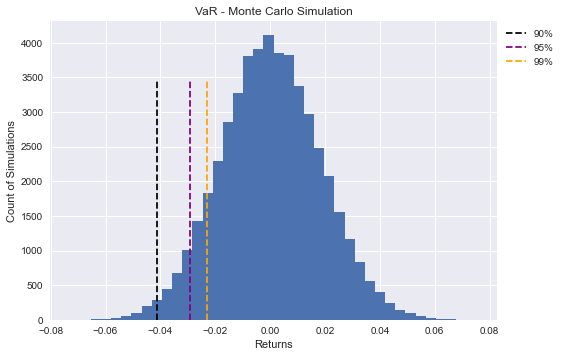

In [34]:

data = fdr.DataReader('AAPL', '2010-01-01', '2022-12-01')
data = data[['Adj Close']]

TRADING_DAYS = data.shape[0]

# Log revenue
data['Log Rets'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# daily standard deviation and annual volatility
daily_vol = np.std(data['Log Rets'])
vol = daily_vol * TRADING_DAYS ** 0.5

t = 1 #risk after t day

def MC_VaR(er, vol, T, iterations):
    end = np.exp((er * vol ** 2) * T +
                     vol * np.sqrt(T) * np.random.standard_normal(iterations))
    return end

at_risk = MC_VaR(er=0.25, vol=vol, T=t/TRADING_DAYS, iterations=50000) -1

percentiles = [1,5,10]
v99,v95,v90 = np.percentile(at_risk, percentiles)
print(tabulate([['90%',v90],['95%',v95],['99%',v99]],headers = ['Confidence level','VaR']))

#graph
import matplotlib.pyplot as plt
plt.style.use('seaborn') #스타일

#bar graph
plt.hist(at_risk,bins = 40)

#confidence level
plt.axvline(x=v99, color='black',  ls='--', ymin=0, ymax=0.8, label='90%')
plt.axvline(x=v95, color='purple', ls='--', ymin=0, ymax=0.8, label='95%')
plt.axvline(x=v90, color='orange',  ls='--', ymin=0, ymax=0.8, label='99%')

plt.title("VaR - Monte Carlo Simulation")
plt.xlabel('Returns')
plt.ylabel('Count of Simulations')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()



The result shows that there's 90% confidence that over the day the stock will not lose more than 0.0229% of the investment, 95% confidence that will not lose more than 0.029%, and 99% confidence that will not lose more than 0.041%. 

# Result

Comparing the reusults of 3 different calculation of VaR, it doesn't show the big difference but only the slight difference. 

In [33]:
print(tabulate([['90%',q_90,var_90, v90],['95%',q_95,var_95,v95],['99%',q_99,var_99,v99]],headers = ['Confidence level','VaR_historical','VaR_variance/Covariance','VaR_MonteCarlo']))


Confidence level      VaR_historical    VaR_variance/Covariance    VaR_MonteCarlo
------------------  ----------------  -------------------------  ----------------
90%                       -0.0191949                 -0.0220449        -0.0228494
95%                       -0.0270188                 -0.0286133        -0.0294078
99%                       -0.047642                  -0.0409345        -0.0413573
